In [10]:
#Importing libraries and packages
import pandas as pd
import researchpy as rp
from statsmodels.multivariate.manova import MANOVA
import seaborn as sns
import matplotlib.pyplot as plt
print('Successfully imported')

Successfully imported


In [12]:
#Importing data sheets
df=pd.read_excel (r'G:\My Drive\Deepak_CIAB\Indexed_data.xlsx',sheet_name='Sheet1')
print('Successfully imported')
df.head(2)


Successfully imported


,Treatment_Type,Voltage,Treatment_Time,Vanillin,Chlorogenic,Ferulic,Sinapic
0,DRB VCP,220V,0,2.48,29.39,1.53,11.93
1,DRB VCP,220V,0,3.40,31.04,1.53,11.35


In [153]:
#indentifying null values in the dataset
print(df.isnull().values.any())

False


In [14]:

from dfply import *
# summary statistics for dependent variables 
df >> group_by(X.Treatment_Type) >> summarize(n=X['Vanillin'].count(), mean=X['Vanillin'].mean(), std=X['Vanillin'].std())

df >> group_by(X.Treatment_Type) >> summarize(n=X['Chlorogenic'].count(), mean=X['Chlorogenic'].mean(), std=X['Chlorogenic'].std())

df >> group_by(X.Treatment_Type) >> summarize(n=X['Ferulic'].count(), mean=X['Ferulic'].mean(), std=X['Ferulic'].std())

df >> group_by(X.Treatment_Type) >> summarize(n=X['Sinapic'].count(), mean=X['Sinapic'].mean(), std=X['Sinapic'].std())

,Treatment_Type,n,mean,std
0,DRB ACP,63,16.079683,5.958727
1,DRB VCP,45,13.875778,3.271393


In [138]:
#defining plotting parameters on font styles
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

C:\Users\karti\AppData\Local\Temp/ipykernel_21964/1511228697.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("drbn1_Vanillin.png", dpi=1200, facecolor='w',


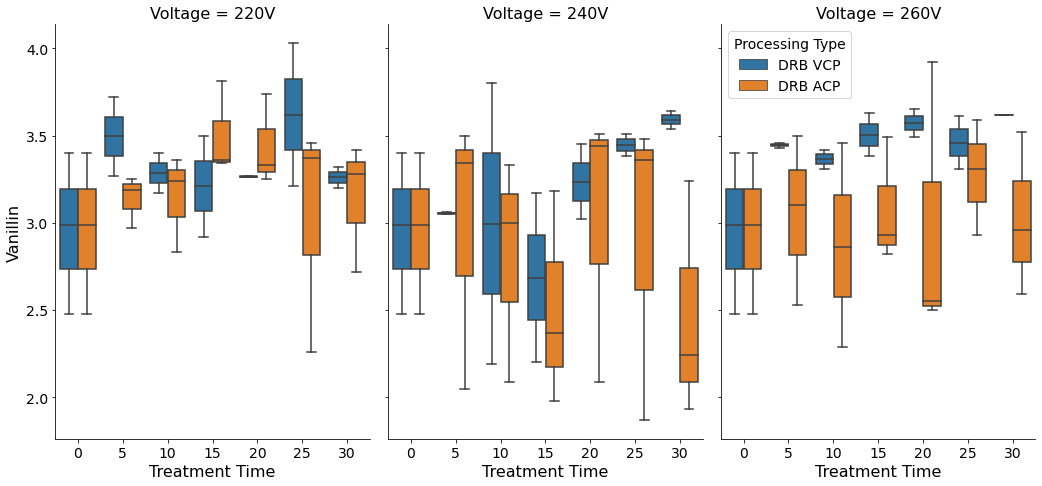

In [152]:
#categorical multi-axis plots for the dependent variables
g_Vanillin = sns.catplot(x="Treatment_Time", y="Vanillin", 
                hue="Treatment_Type", col="Voltage",
                data=df,  kind="box", legend=False, 
                height=7, aspect=.7);
#fig.savefig('DRB.png', format='png', dpi=1200)
g_Vanillin.set(xlabel ="Treatment Time", ylabel = "Vanillin")
plt.legend(title='Processing Type', loc='upper left')
plt.savefig("drbn1_Vanillin.png", dpi=1200, facecolor='w',  
               orientation= 'landscape', format='png', transparent=True, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)


C:\Users\karti\AppData\Local\Temp/ipykernel_21964/1328636775.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("drbn1_Chlorogenic.png", dpi=1200, facecolor='w',


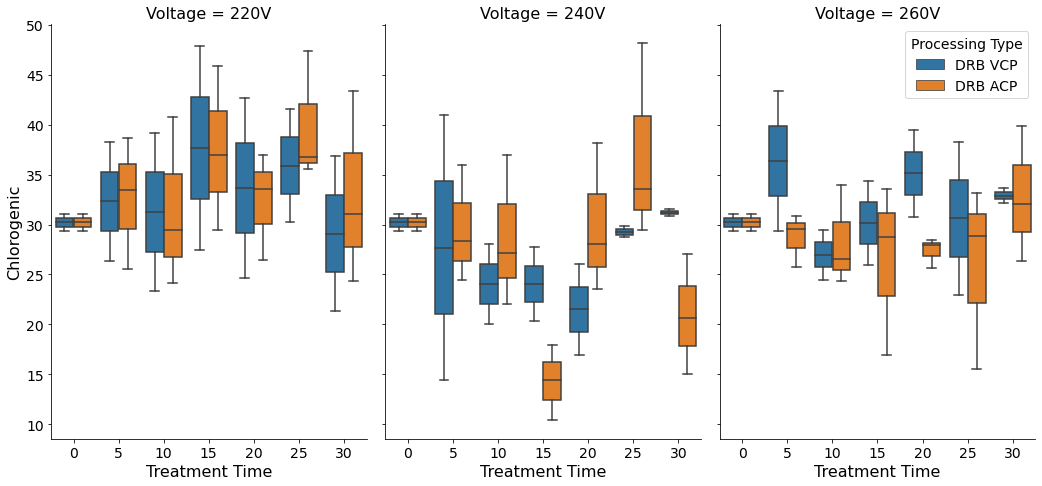

In [154]:
#categorical multi-axis plots for the dependent variables
g_Chlorogenic = sns.catplot(x="Treatment_Time", y="Chlorogenic", 
                hue="Treatment_Type", col="Voltage",
                data=df,  kind="box", legend=False, 
                height=7, aspect=.7);
#fig.savefig('DRB.png', format='png', dpi=1200)
g_Chlorogenic.set(xlabel ="Treatment Time", ylabel = "Chlorogenic")
plt.legend(title='Processing Type', loc='upper right')
plt.savefig("drbn1_Chlorogenic.png", dpi=1200, facecolor='w',  
               orientation= 'landscape', format='png', transparent=True, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)


C:\Users\karti\AppData\Local\Temp/ipykernel_21964/4005524904.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("drbn1_Ferulic.png", dpi=1200, facecolor='w',


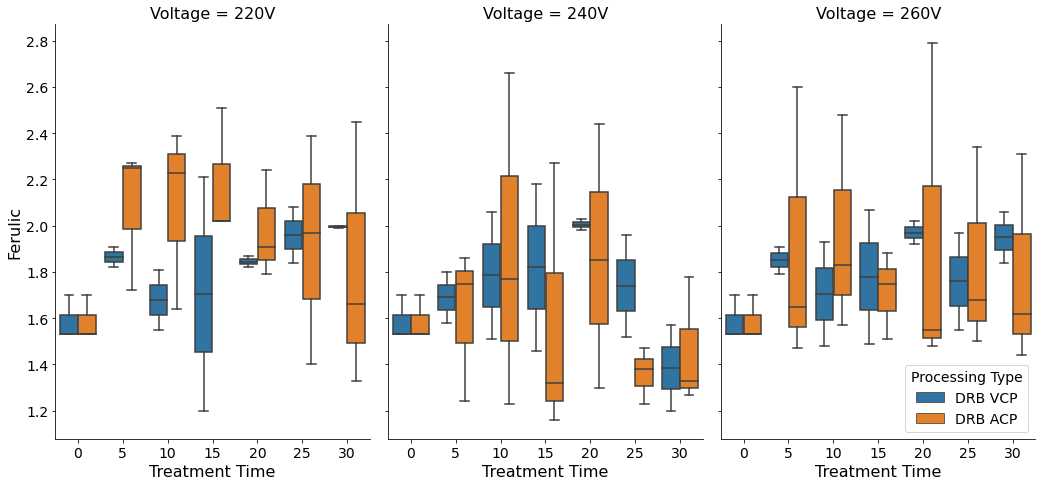

In [156]:
#categorical multi-axis plots for the dependent variables
g_Ferulic = sns.catplot(x="Treatment_Time", y="Ferulic", 
                hue="Treatment_Type", col="Voltage",
                data=df,  kind="box", legend=False, 
                height=7, aspect=.7);
#fig.savefig('DRB.png', format='png', dpi=1200)
g_Ferulic.set(xlabel ="Treatment Time", ylabel = "Ferulic")
plt.legend(title='Processing Type', loc='lower right')
plt.savefig("drbn1_Ferulic.png", dpi=1200, facecolor='w',  
               orientation= 'landscape', format='png', transparent=True,
            bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)


C:\Users\karti\AppData\Local\Temp/ipykernel_21964/3945642643.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("drbn1_Sinapic.png", dpi=1200, facecolor='w',


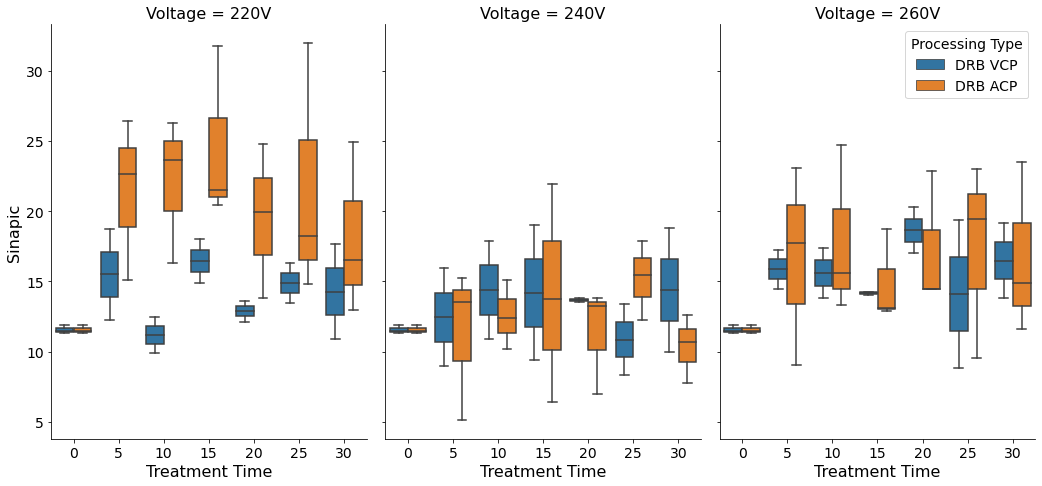

In [155]:
#categorical multi-axis plots for the dependent variables
g_Sinapic = sns.catplot(x="Treatment_Time", y="Sinapic", 
                hue="Treatment_Type", col="Voltage",
                data=df,  kind="box", legend=False, 
                height=7, aspect=.7);
#fig.savefig('DRB.png', format='png', dpi=1200)
g_Sinapic.set(xlabel ="Treatment Time", ylabel = "Sinapic")
plt.legend(title='Processing Type', loc='upper right')
plt.savefig("drbn1_Sinapic.png", dpi=1200, facecolor='w',  
               orientation= 'landscape', format='png', transparent=True,
            bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)

In [160]:
#Three-way Manova analysis of variables
maov=MANOVA.from_formula('Vanillin + Chlorogenic + Ferulic + Sinapic ~ Treatment_Type + Voltage + Treatment_Time', data=df)


print(maov.mv_test())
